In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
dataset = pd.read_csv('test.csv')

# Display all the columns of the dataset
pd.pandas.set_option('display.max_columns', None)

In [193]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [194]:
dataset.shape

(1459, 80)

## Missing Values

In [195]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [196]:
features_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>=1]

In [197]:
print('Percentage of missing values in each feature: \n')
for feature in features_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4))

Percentage of missing values in each feature: 

MSZoning 0.0027
LotFrontage 0.1556
Alley 0.9267
Utilities 0.0014
Exterior1st 0.0007
Exterior2nd 0.0007
MasVnrType 0.011
MasVnrArea 0.0103
BsmtQual 0.0302
BsmtCond 0.0308
BsmtExposure 0.0302
BsmtFinType1 0.0288
BsmtFinSF1 0.0007
BsmtFinType2 0.0288
BsmtFinSF2 0.0007
BsmtUnfSF 0.0007
TotalBsmtSF 0.0007
BsmtFullBath 0.0014
BsmtHalfBath 0.0014
KitchenQual 0.0007
Functional 0.0014
FireplaceQu 0.5003
GarageType 0.0521
GarageYrBlt 0.0535
GarageFinish 0.0535
GarageCars 0.0007
GarageArea 0.0007
GarageQual 0.0535
GarageCond 0.0535
PoolQC 0.9979
Fence 0.8012
MiscFeature 0.965
SaleType 0.0007


#### Observation-
Missing values exist

### We have insights from the Exploratory data analysis of Train data. We can simply use those insights to transform out test data as well.

# Feature Engineering
1. Missing Values
2. Temporal Variables
3. Numerical Features - skewed or not
3. Categorical variables: remove rare labels
4. Outlier Removal
5. encoding categorical variables
6. train test split
5. Standardise numerical variables

## 1. Missing Values

### Categorical Variables

In [198]:
categorical_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes == 'O']

print('Categorical variables along with their missing value percentage: \n')
for feature in categorical_nan:
    print("{}: {}%".format(feature, np.round(dataset[feature].isnull().mean(), 4)))

Categorical variables along with their missing value percentage: 

MSZoning: 0.0027%
Alley: 0.9267%
Utilities: 0.0014%
MasVnrType: 0.011%
BsmtQual: 0.0302%
BsmtCond: 0.0308%
BsmtExposure: 0.0302%
BsmtFinType1: 0.0288%
BsmtFinType2: 0.0288%
Functional: 0.0014%
FireplaceQu: 0.5003%
GarageType: 0.0521%
GarageFinish: 0.0535%
GarageQual: 0.0535%
GarageCond: 0.0535%
PoolQC: 0.9979%
Fence: 0.8012%
MiscFeature: 0.965%


In [199]:
def replace_cat_feature(dataset, features_nan):
    data = dataset.copy()
    data[features_nan] = data[features_nan].fillna('Missing')
    #creating a new category called 'Missing'
    
    return data

dataset = replace_cat_feature(dataset, categorical_nan)

dataset[categorical_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

### Numerical Features

In [200]:
numerical_nan = [feature for feature in dataset.columns if dataset[feature].dtype != 'O' and dataset[feature].isnull().sum()>=1]

print('Numerical variables along with their missing value percentage: \n')
for feature in numerical_nan:
    print('{} : {}%'.format(feature, np.round(dataset[feature].isnull().mean(), 4)))

Numerical variables along with their missing value percentage: 

LotFrontage : 0.1556%
MasVnrArea : 0.0103%
BsmtFinSF1 : 0.0007%
BsmtFinSF2 : 0.0007%
BsmtUnfSF : 0.0007%
TotalBsmtSF : 0.0007%
BsmtFullBath : 0.0014%
BsmtHalfBath : 0.0014%
GarageYrBlt : 0.0535%
GarageCars : 0.0007%
GarageArea : 0.0007%


In [201]:
for feature in numerical_nan:
    median_value = dataset[feature].median()
    
    # create a new column to capture nan value
    dataset[feature + 'nan'] = np.where(dataset[feature].isnull(), 1, 0)
    dataset[feature].fillna(median_value, inplace=True)

dataset[numerical_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

## 2. Temporal Features

In [202]:
temporal_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

for feature in temporal_features[:-1]:
    dataset[feature] = dataset['YrSold'] - dataset[feature]
    
dataset[temporal_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,49,49,49.0,2010
1,52,52,52.0,2010
2,13,12,13.0,2010
3,12,12,12.0,2010
4,18,18,18.0,2010


## 3. Numerical Continuous Features
Transform the variables into their log normal form. We observed that the data in train set was skewed. So we'll transform those features here as well.

In [203]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype!='O']
discrete_features = [feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in temporal_features]
continuous_features = [feature for feature in numerical_features if feature not in (discrete_features + temporal_features + ['Id'])]
print('Total number of continuous features: {}'.format(len(continuous_features)))

Total number of continuous features: 16


In [204]:
cont_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in cont_features:
    dataset[feature] = np.log(dataset[feature])

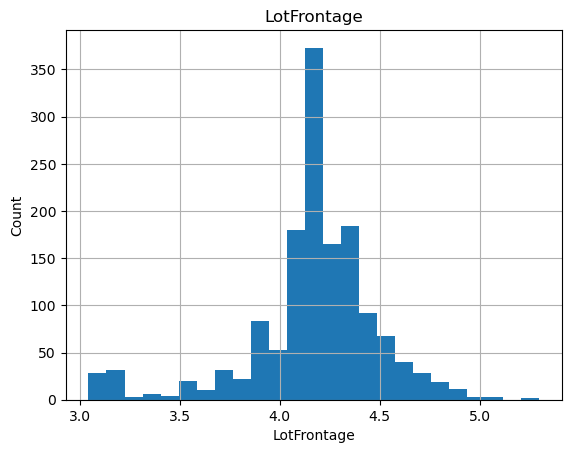

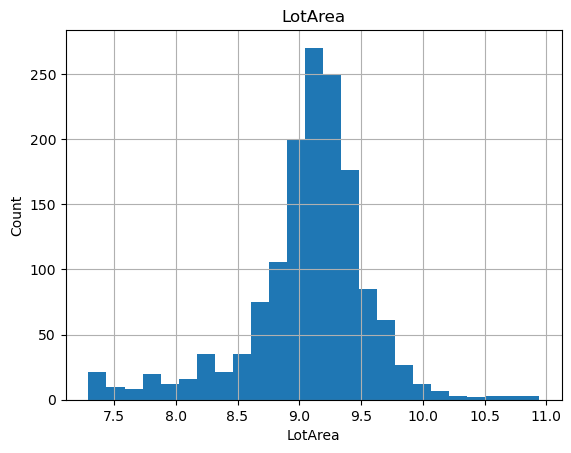

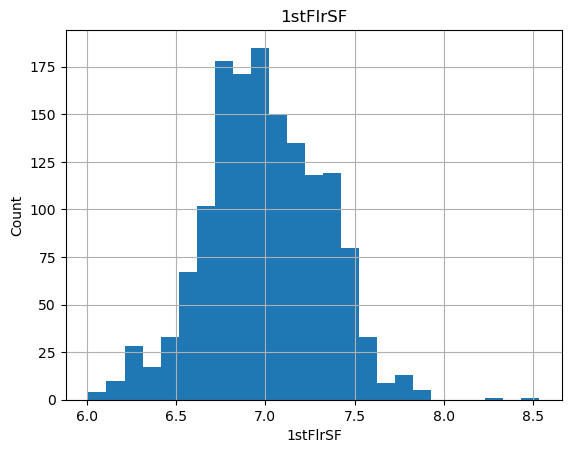

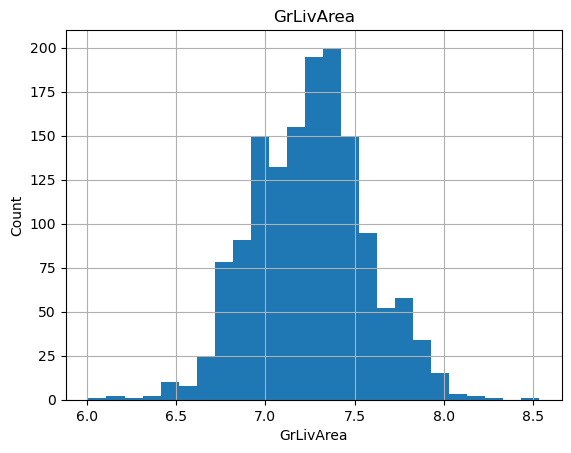

In [205]:
for feature in cont_features:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature].hist(bins=25)

        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

## 4. Categorical variables: 
#### handling rare categorical Variables

In [206]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

1. Calculate the relative frequency of each unique value in the categorical features based on the training set. The first two lines in the for loop do the same.

2. Then Apply the same transformation to the categorical features in the test set, replacing rare categories with the string 'Rare_var'.

In [207]:
train_set = pd.read_csv('train.csv')

In [208]:
for feature in categorical_features:
    temp_train = train_set.groupby(feature)['SalePrice'].count() / len(train_set)
    temp_df_train = temp_train[temp_train > 0.01].index
    dataset[feature] = np.where(dataset[feature].isin(temp_df_train), dataset[feature], 'Rare_var')

In [209]:
dataset[categorical_features].head(50)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,Rare_var,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Rare_var,Attchd,Unf,TA,TA,Y,Rare_var,MnPrv,Rare_var,WD,Normal
1,RL,Pave,Rare_var,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Rare_var,Attchd,Unf,TA,TA,Y,Rare_var,Rare_var,Rare_var,WD,Normal
2,RL,Pave,Rare_var,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,Rare_var,MnPrv,Rare_var,WD,Normal
3,RL,Pave,Rare_var,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,Rare_var,Rare_var,Rare_var,WD,Normal
4,RL,Pave,Rare_var,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Rare_var,Attchd,RFn,TA,TA,Y,Rare_var,Rare_var,Rare_var,WD,Normal
5,RL,Pave,Rare_var,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,Rare_var,Rare_var,Rare_var,WD,Normal
6,RL,Pave,Rare_var,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,Gd,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Rare_var,Attchd,Fin,TA,TA,Y,Rare_var,GdPrv,Shed,WD,Normal
7,RL,Pave,Rare_var,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,Y,Rare_var,Rare_var,Rare_var,WD,Normal
8,RL,Pave,Rare_var,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,PConc,Gd,TA,Gd,GLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Po,Attchd,Unf,TA,TA,Y,Rare_var,Rare_var,Rare_var,WD,Normal
9,RL,Pave,Rare_var,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Typ,Rare_var,Attchd,Fin,TA,TA,Y,Rare_var,MnPrv,Rare_var,WD,Normal


## 5. Outliers

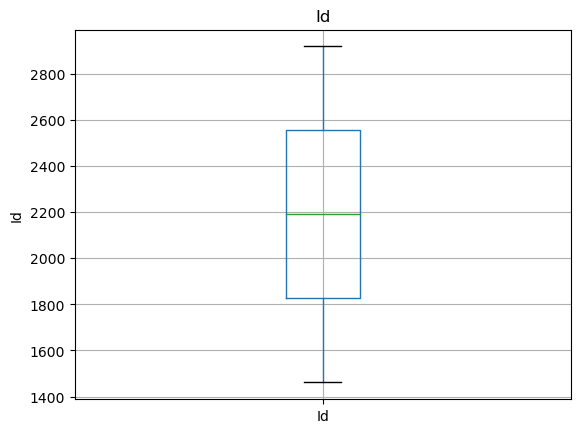

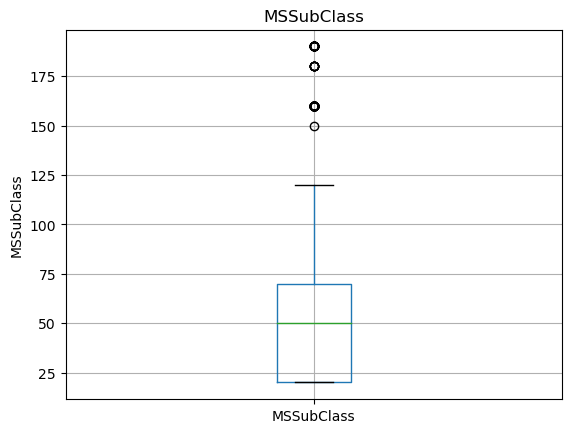

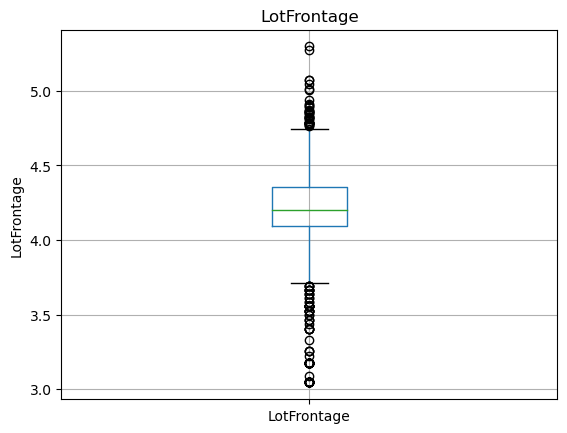

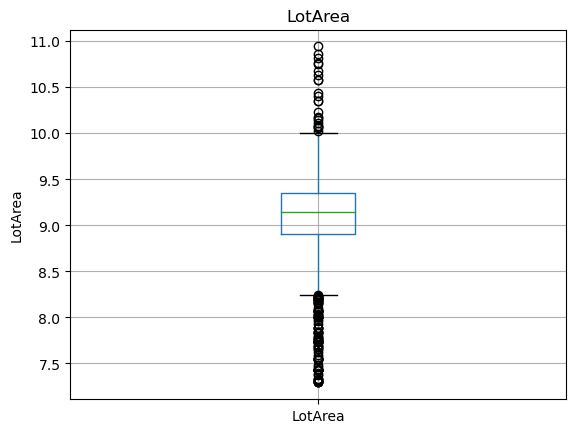

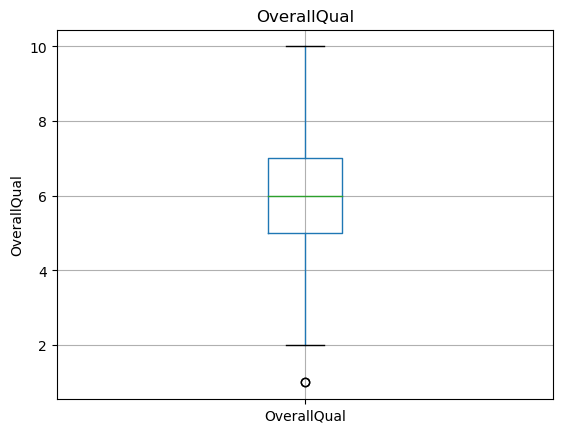

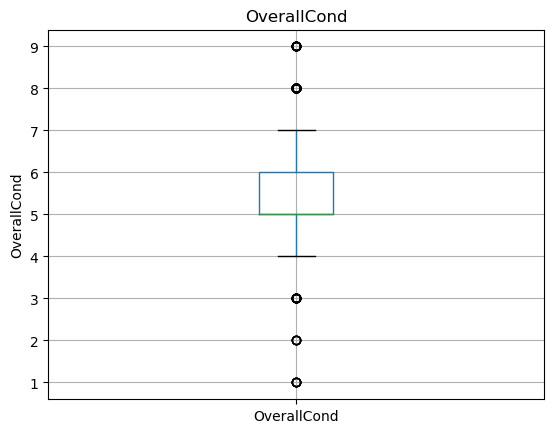

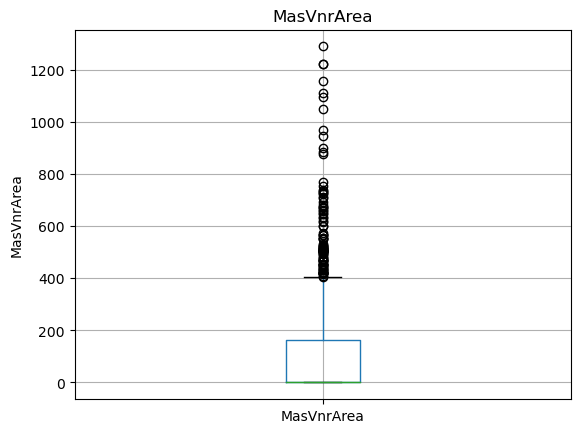

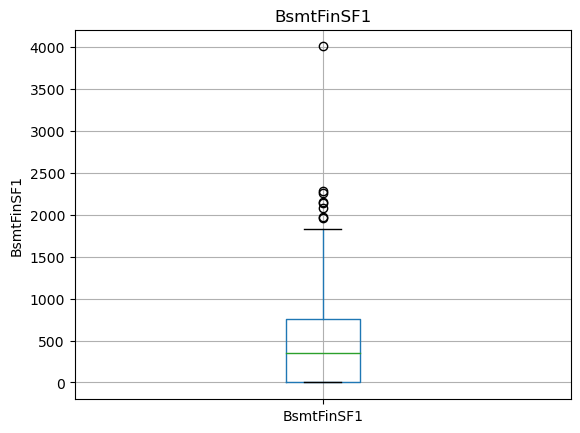

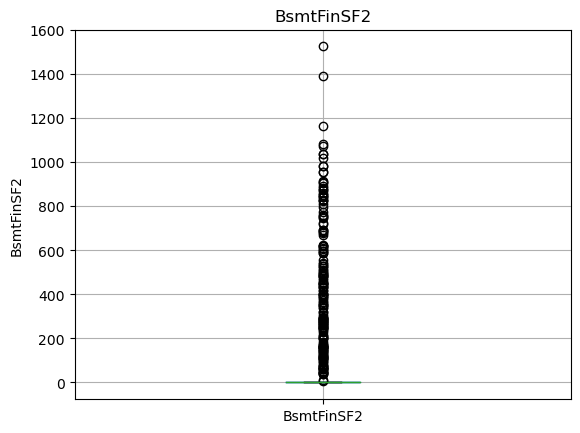

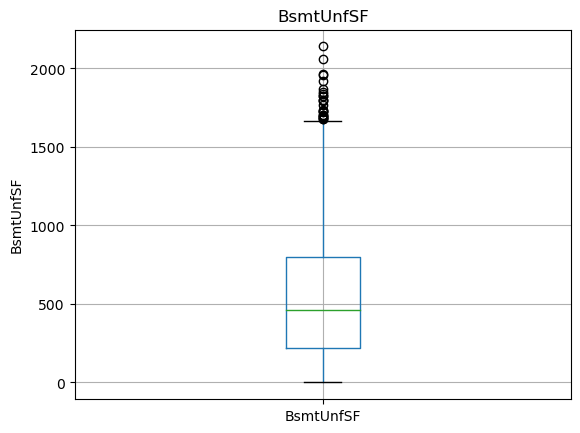

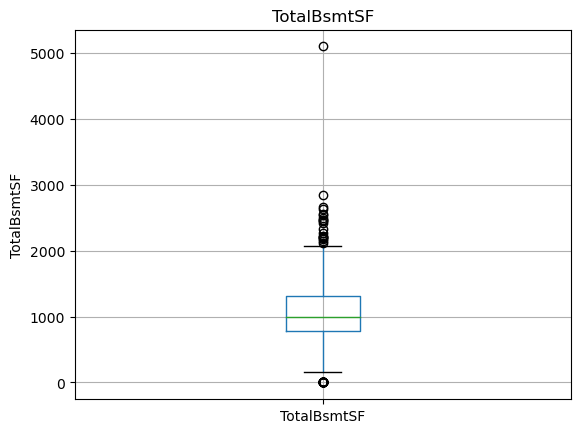

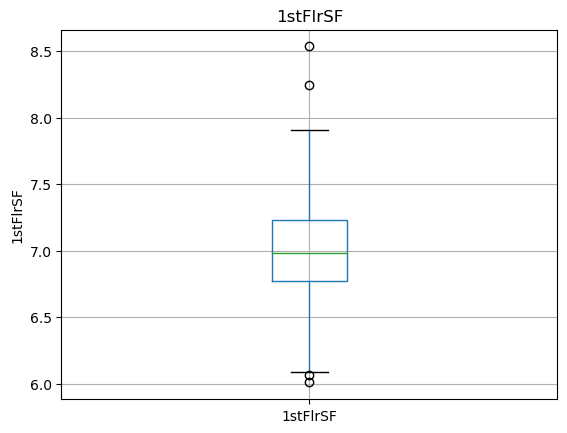

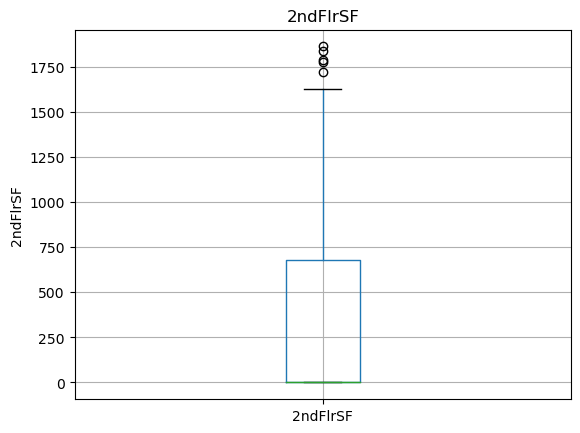

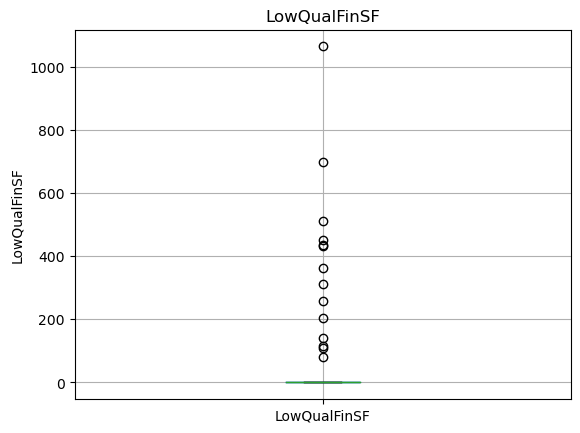

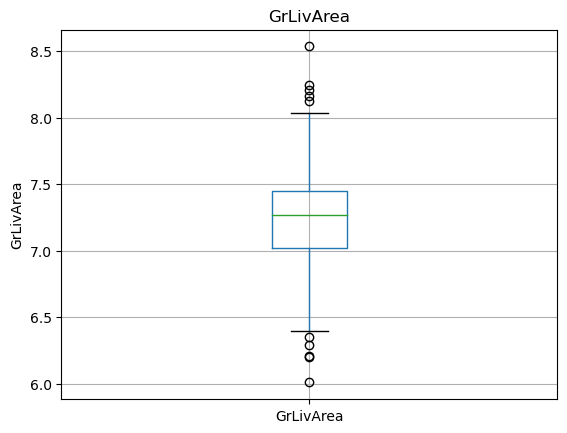

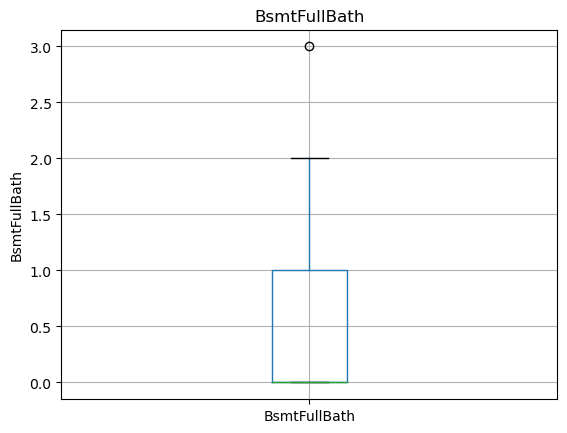

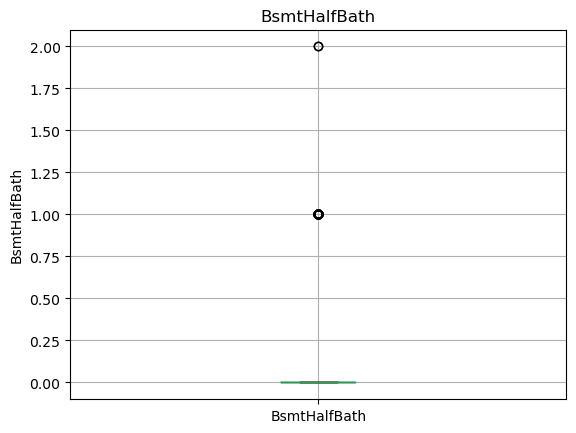

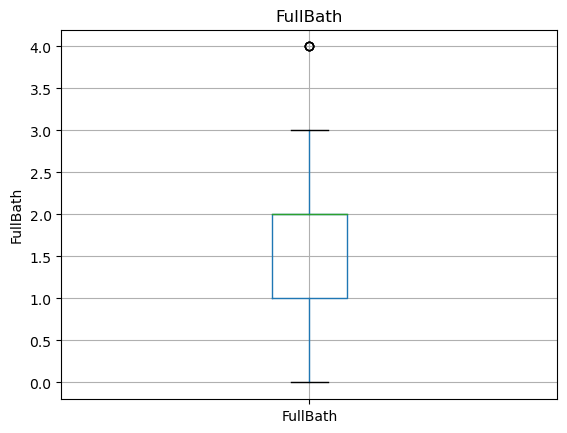

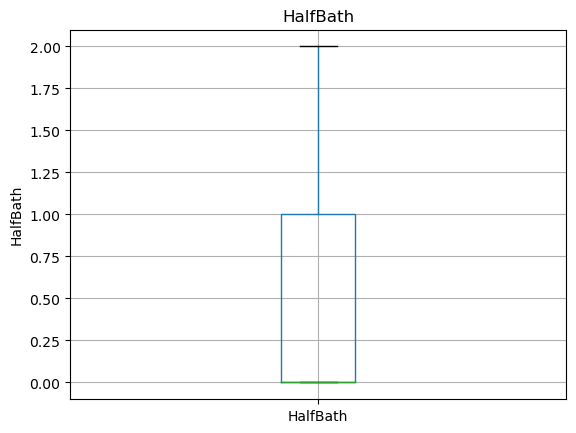

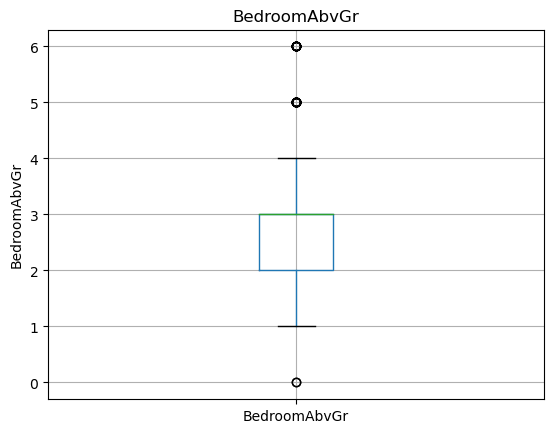

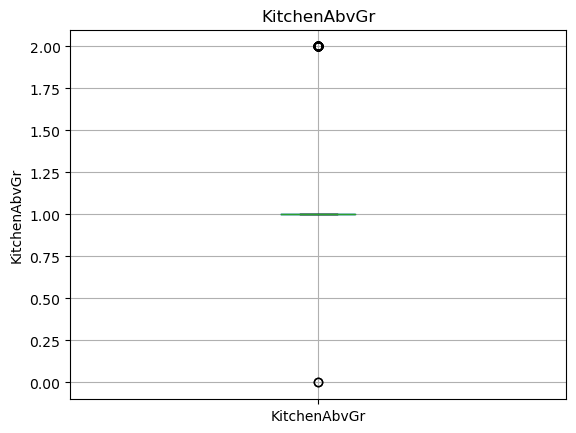

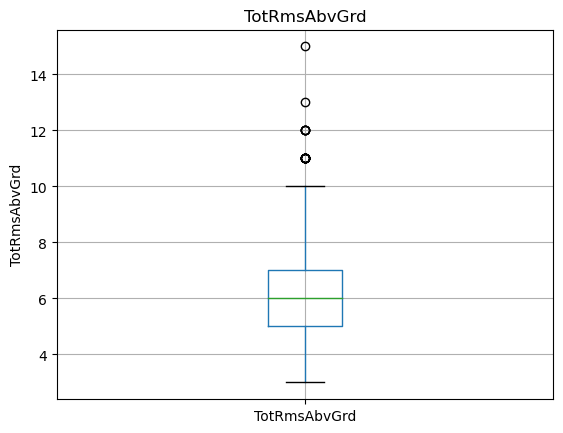

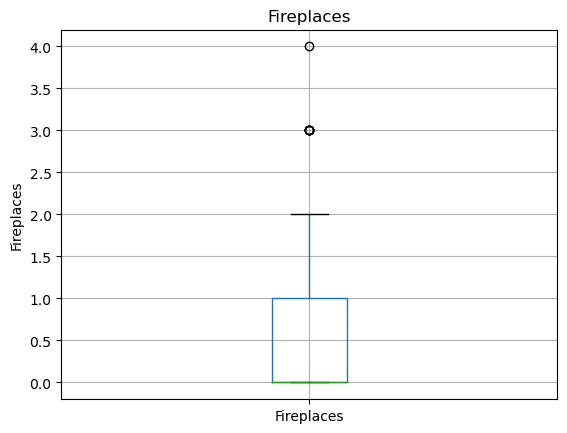

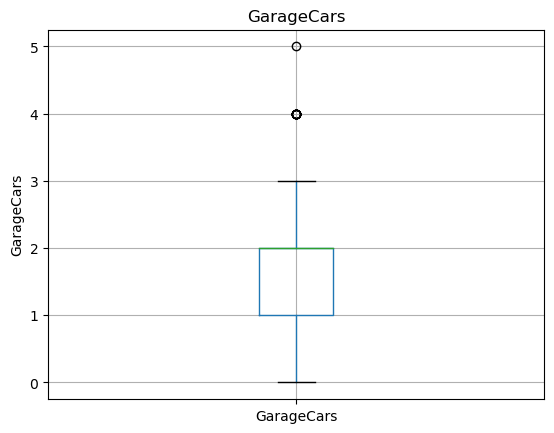

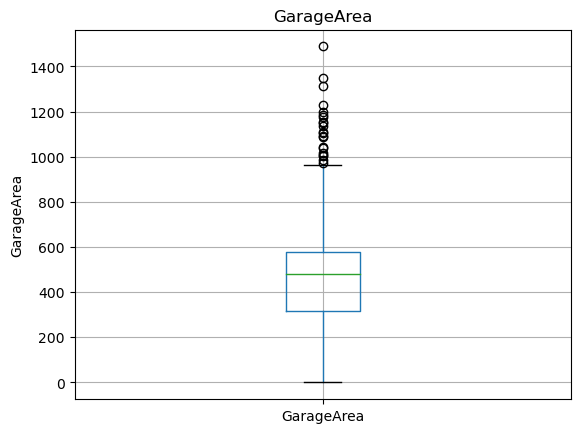

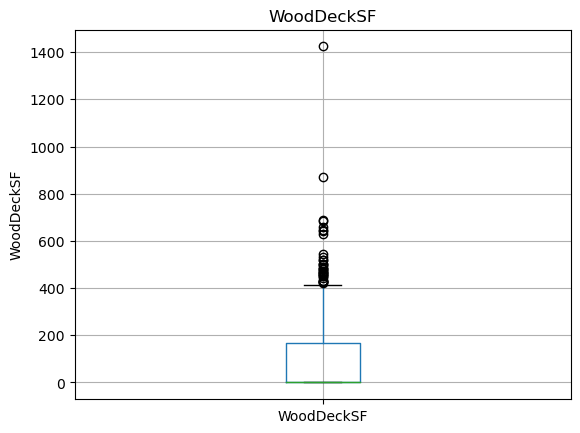

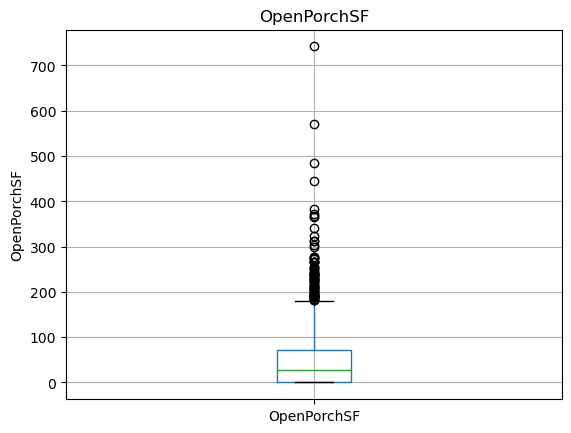

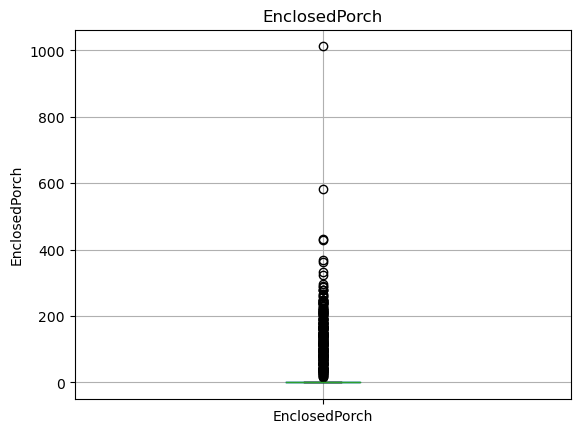

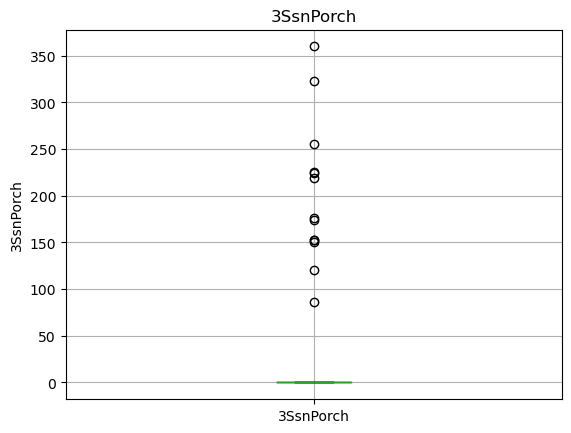

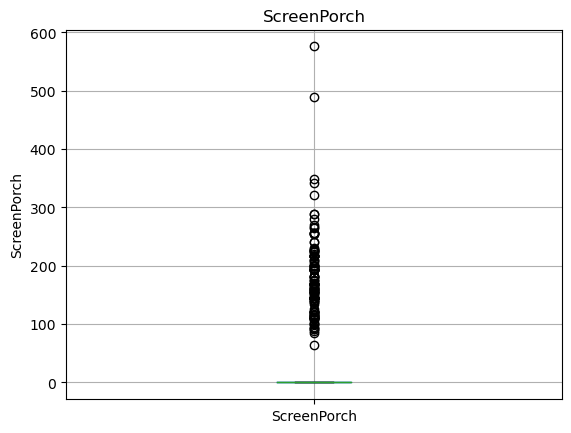

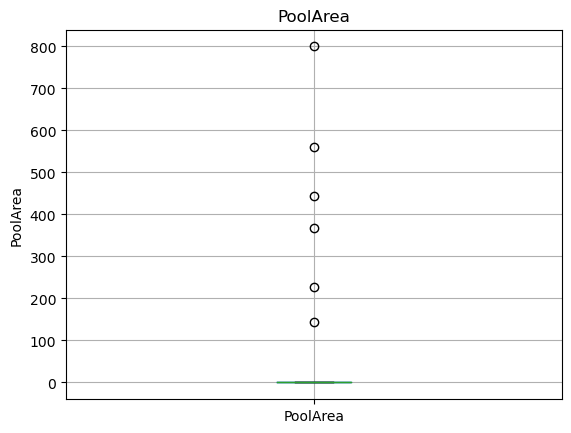

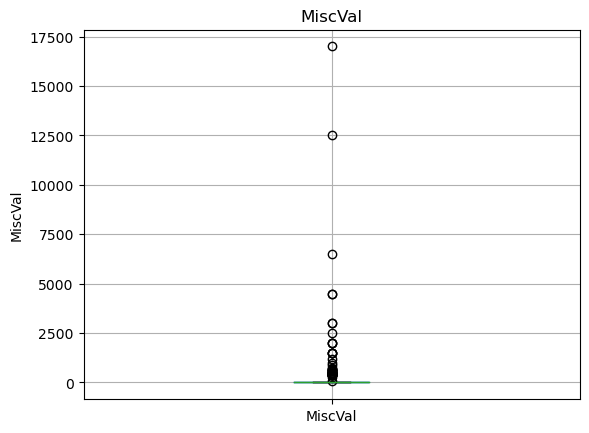

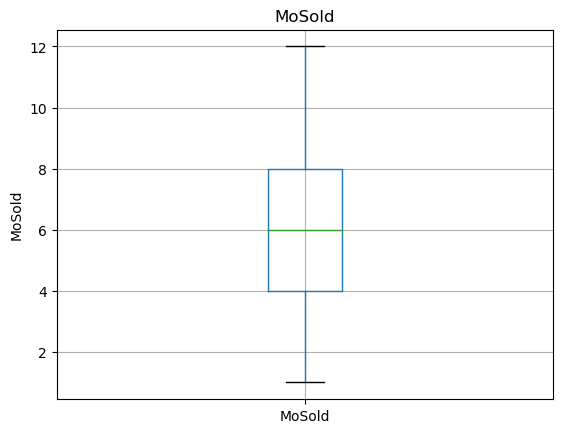

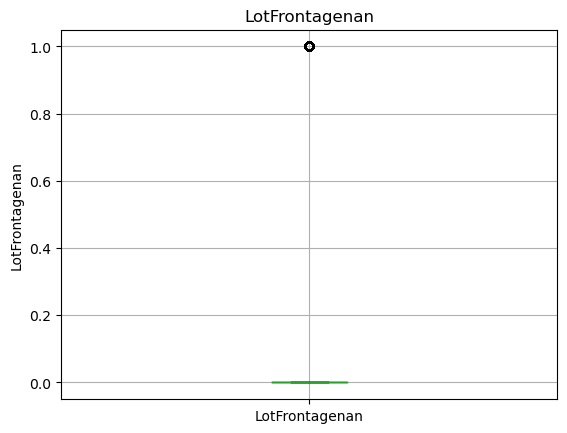

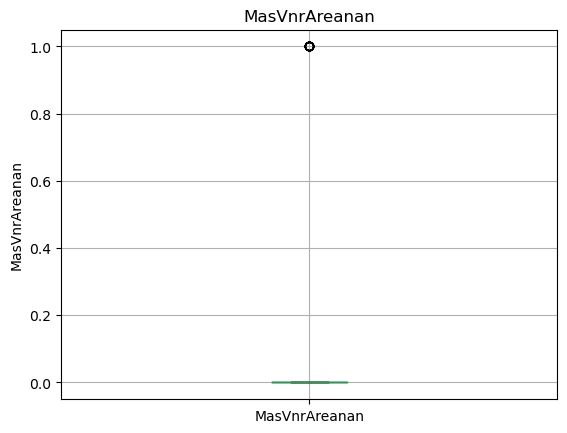

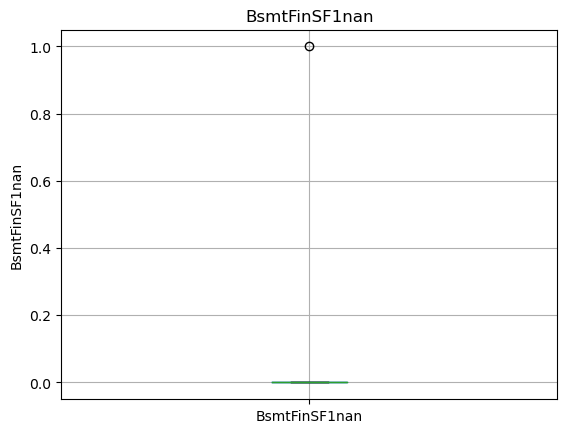

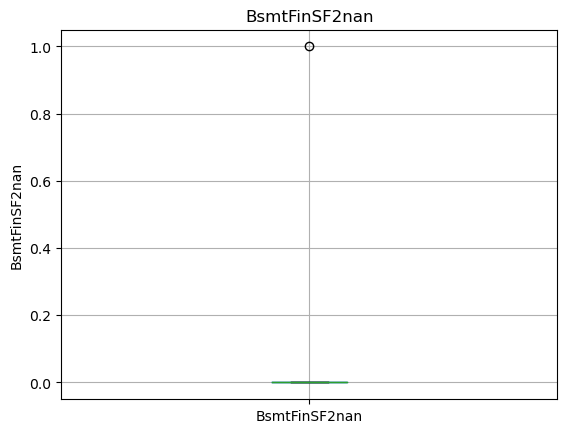

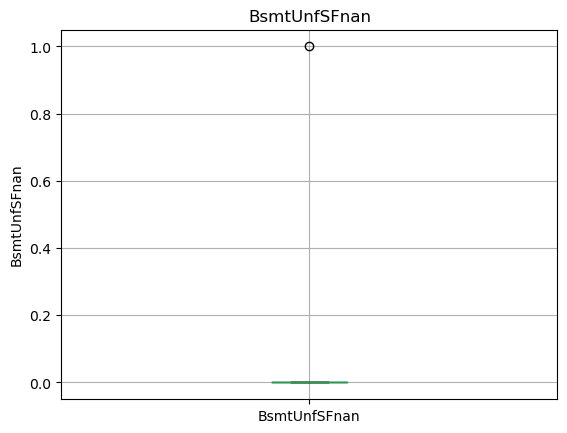

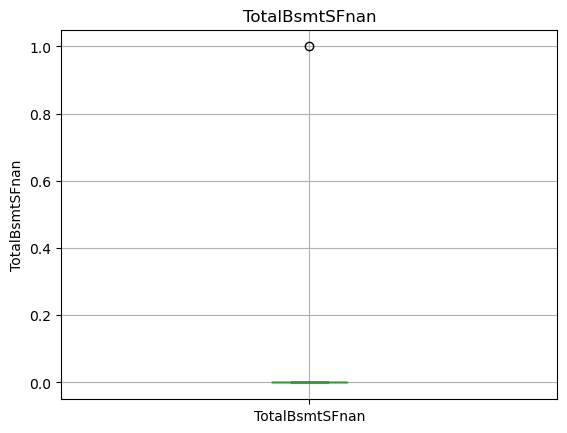

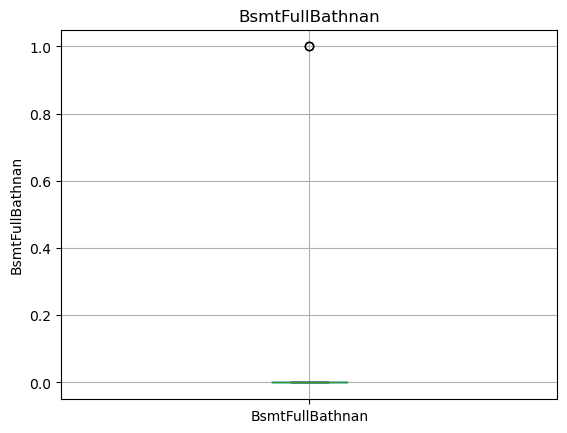

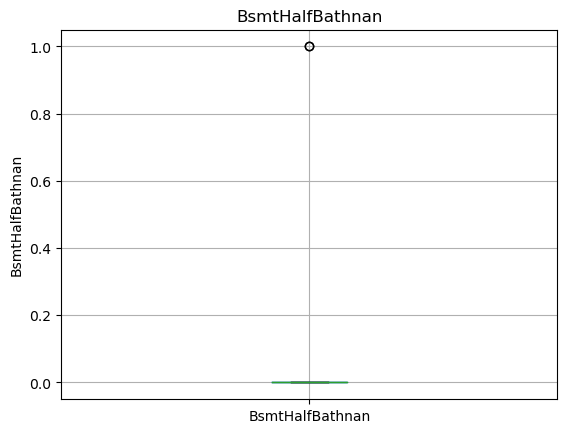

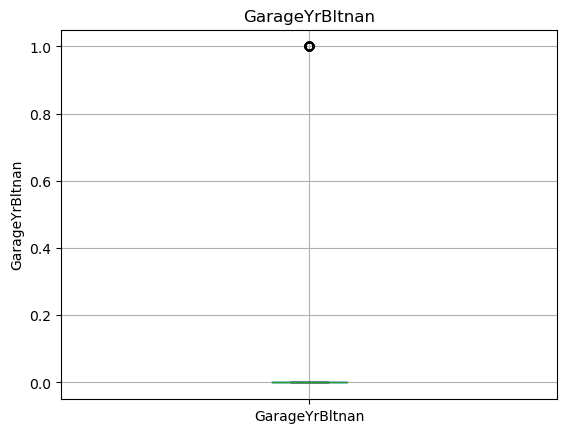

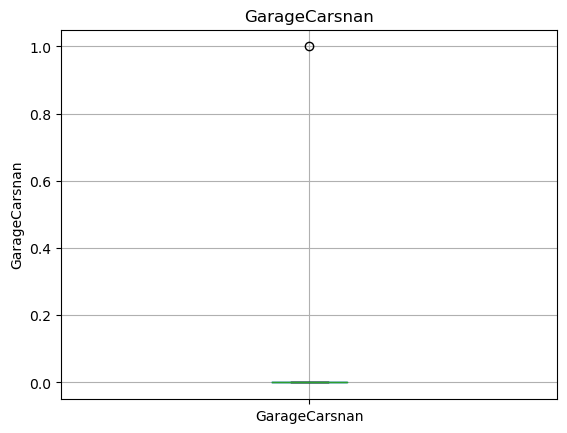

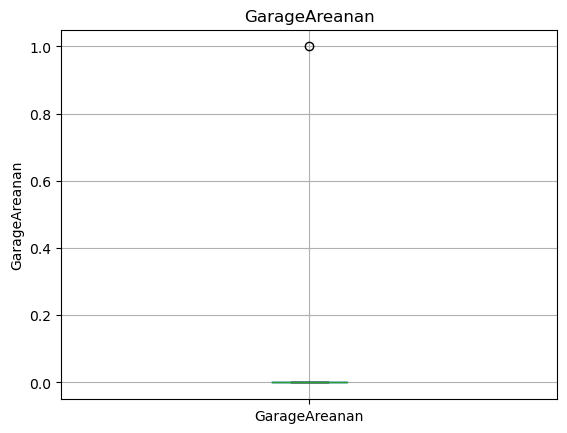

In [210]:
num_features = [feature for feature in dataset.columns if feature not in categorical_features and feature not in temporal_features]
for feature in num_features:
    plt.figure()  # Create a new figure for each boxplot
    dataset.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [211]:
def remove_outliers_iqr(df, numerical_features):
    df_filtered = df.copy()
    
    for feature in numerical_features:
        q1 = df_filtered[feature].quantile(0.25)
        q3 = df_filtered[feature].quantile(0.75)
        iqr = q3 - q1
        
        lower_fence = q1 - 1.5 * iqr
        upper_fence = q3 + 1.5 * iqr
        
        df_filtered = df_filtered[(df_filtered[feature] >= lower_fence) & (df_filtered[feature] <= upper_fence)]
    
    return df_filtered

In [212]:
dataset = remove_outliers_iqr(dataset,num_features)

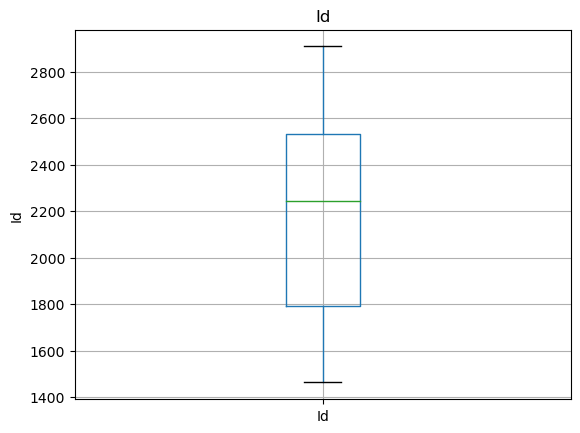

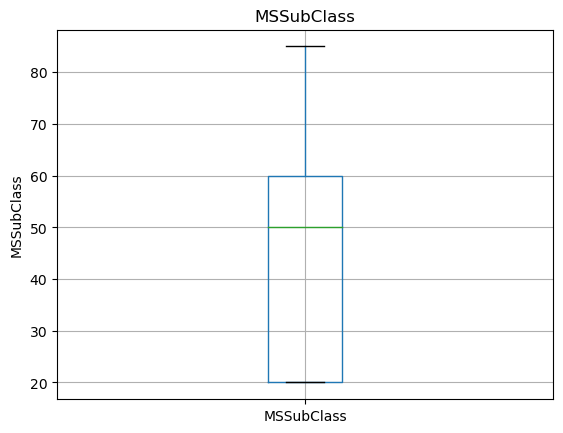

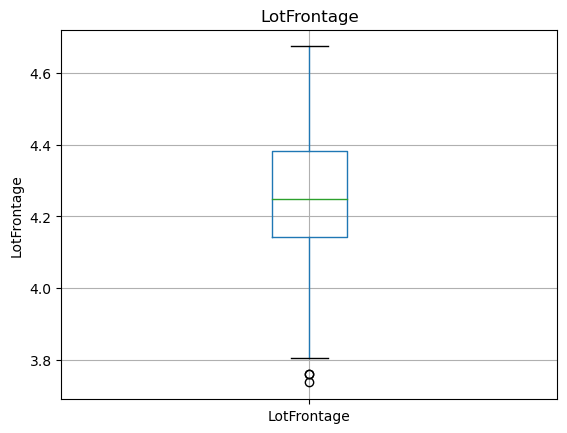

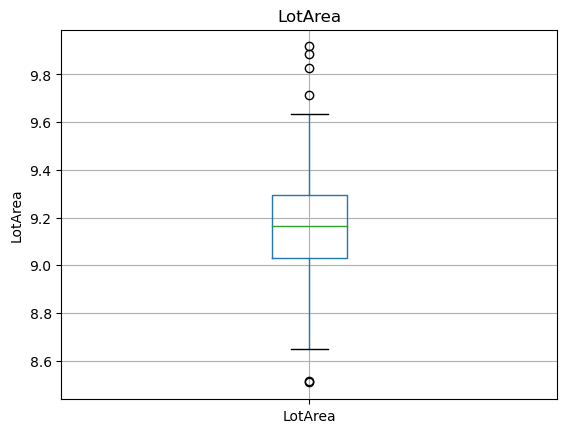

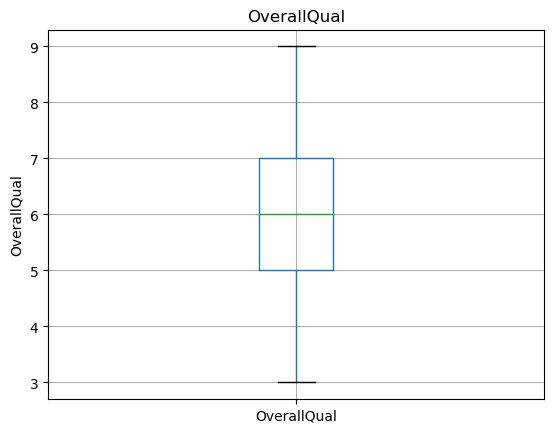

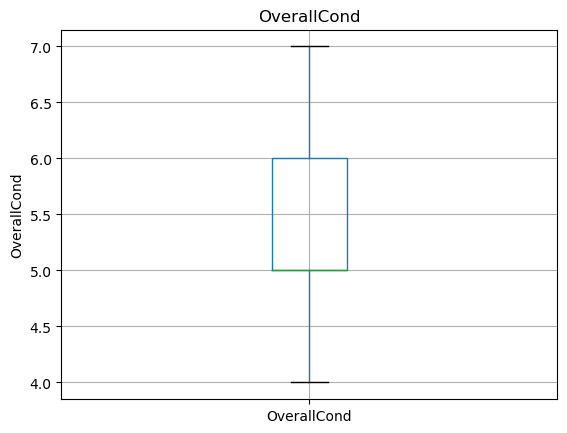

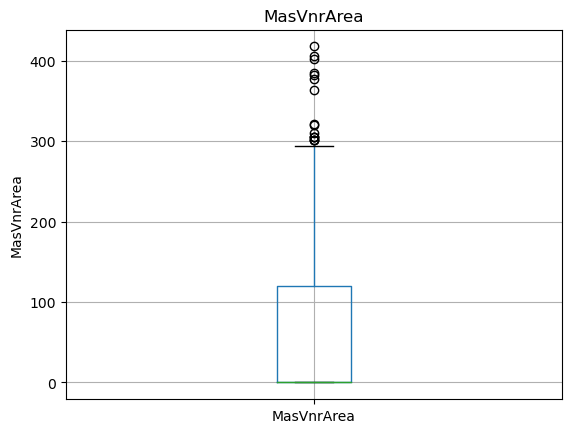

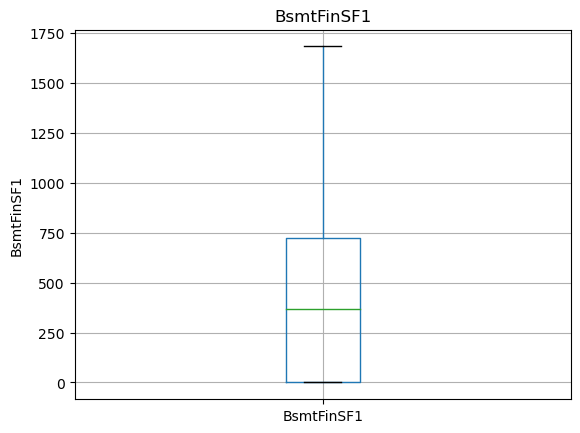

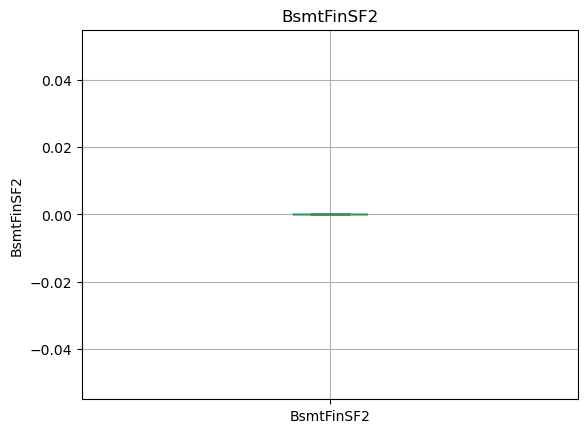

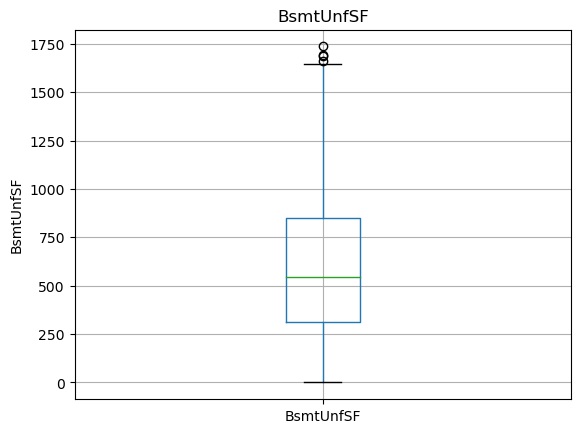

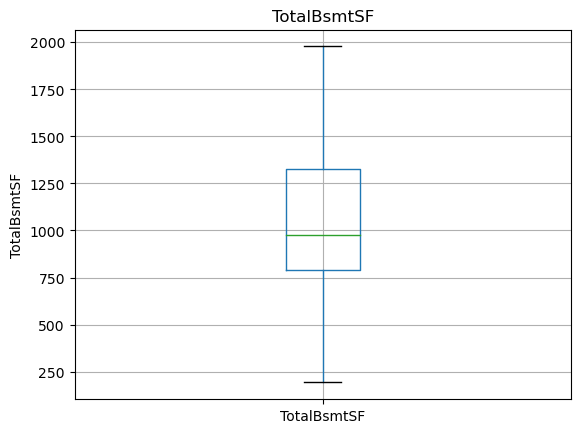

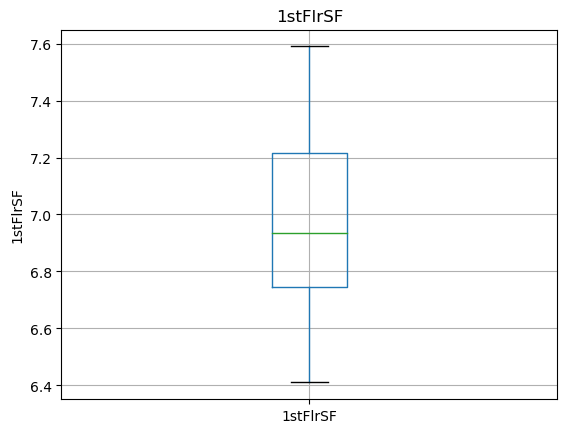

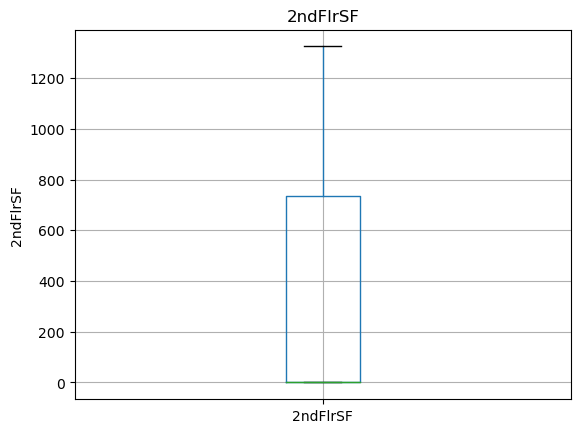

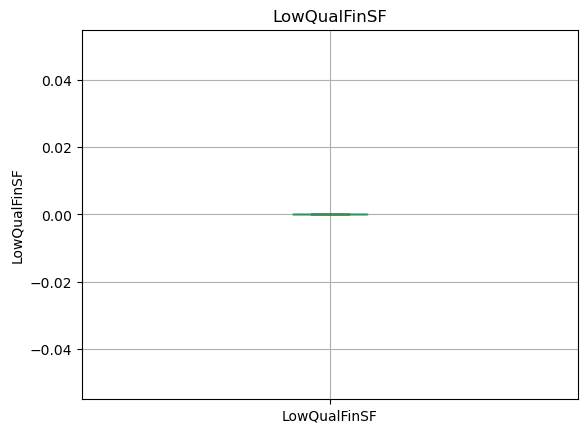

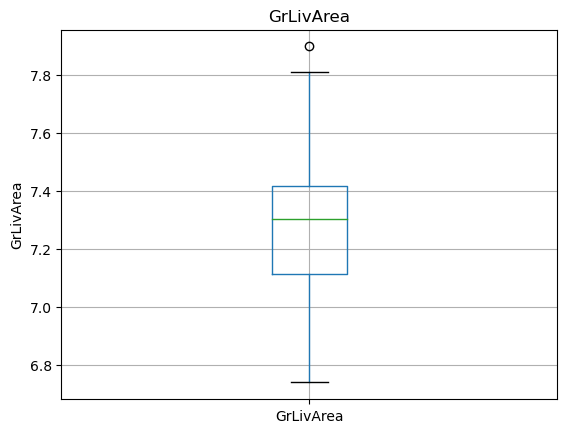

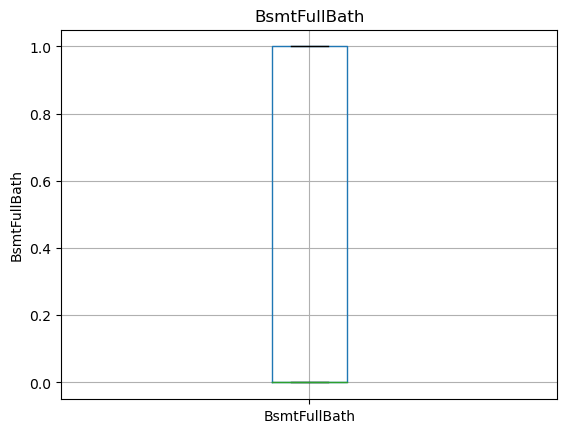

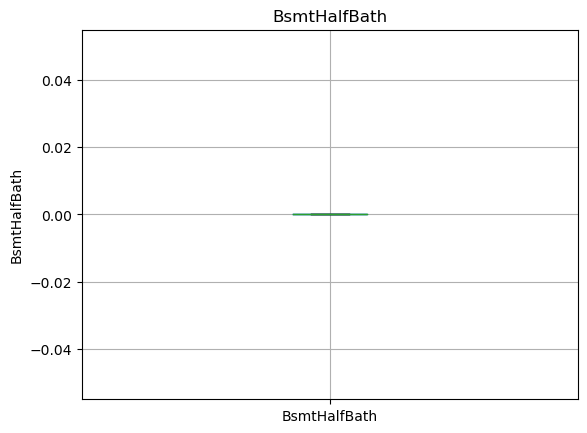

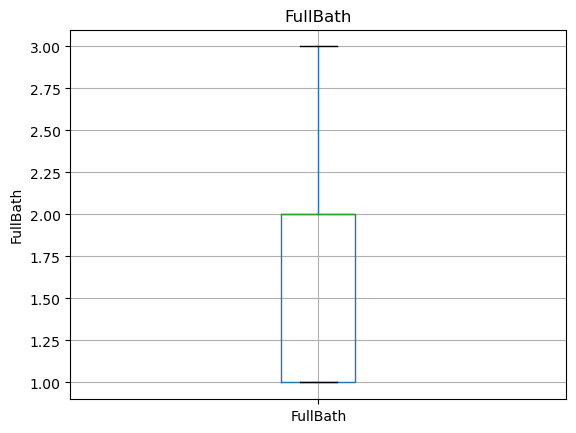

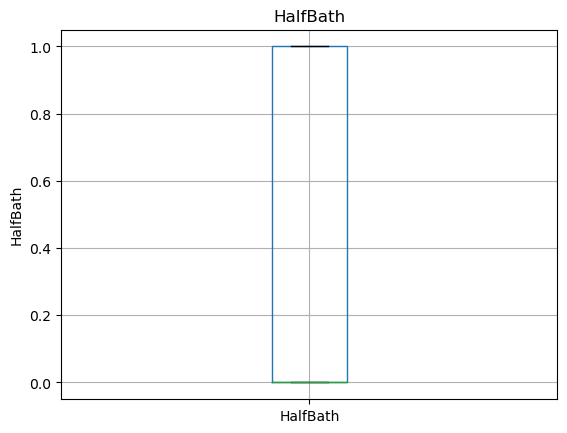

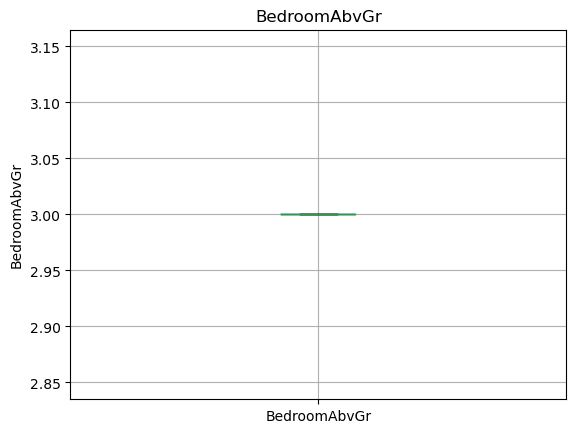

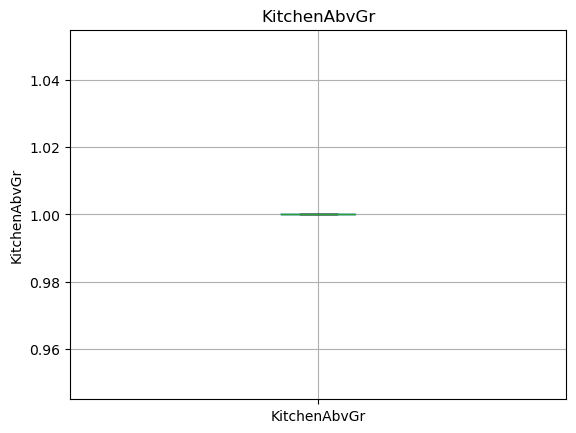

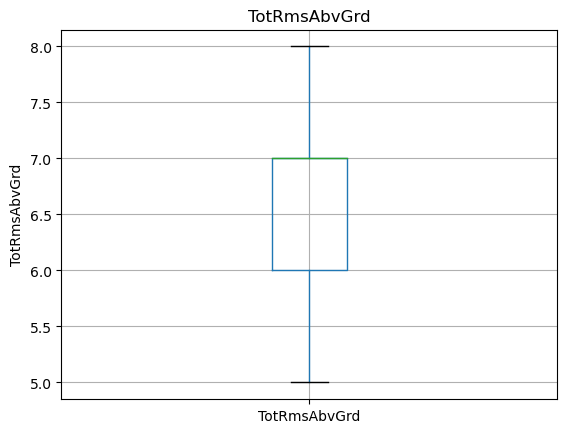

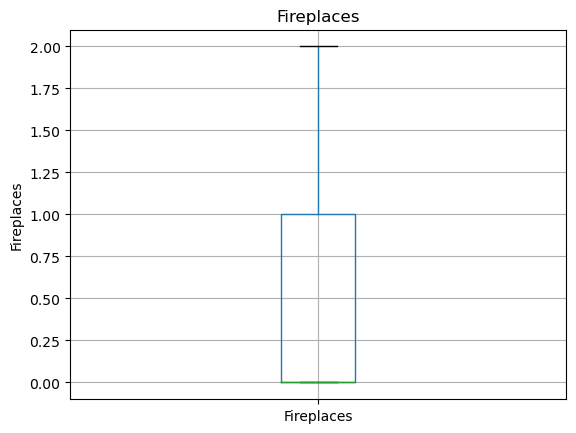

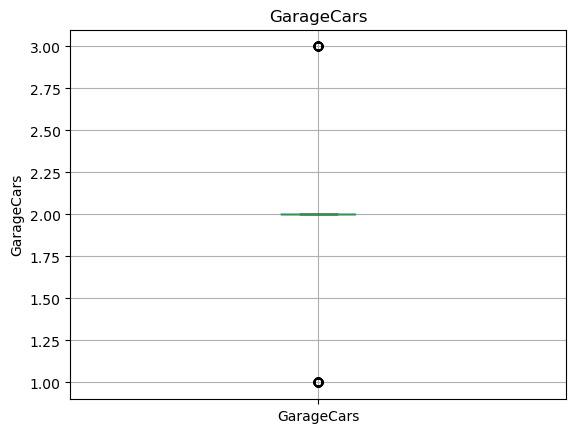

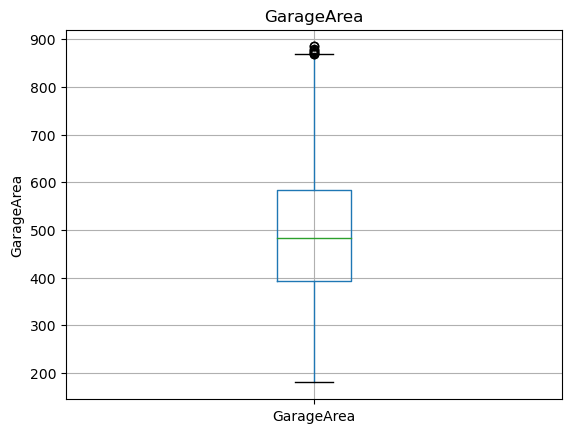

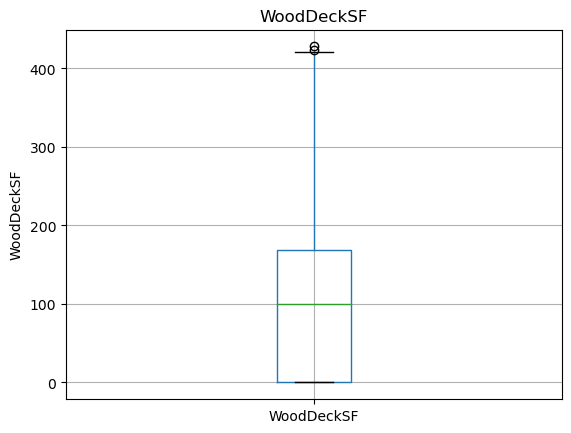

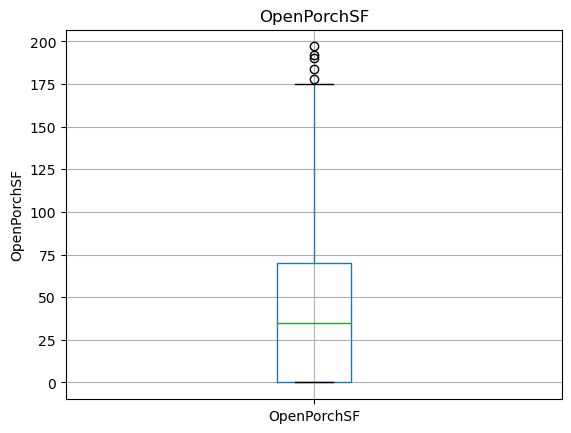

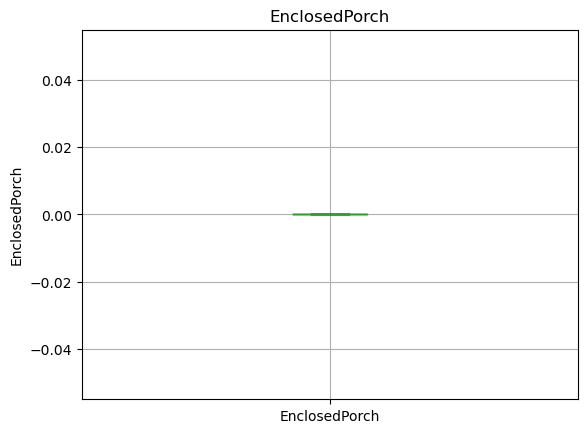

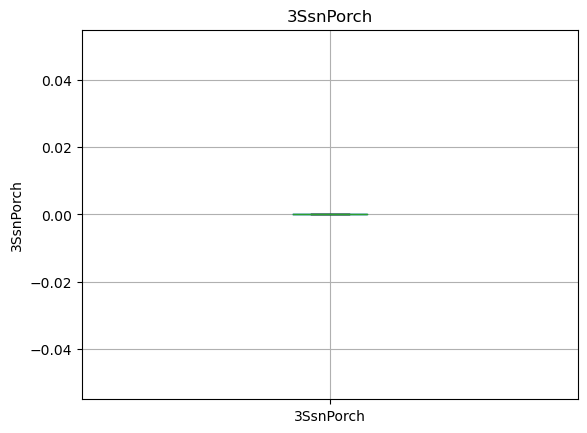

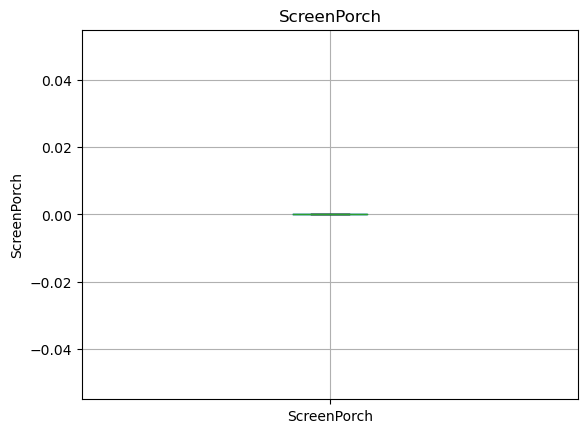

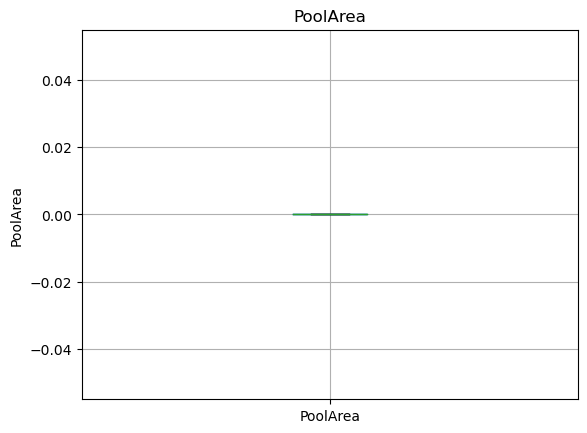

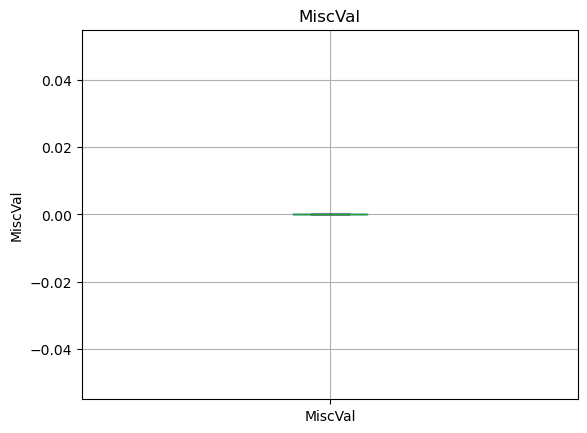

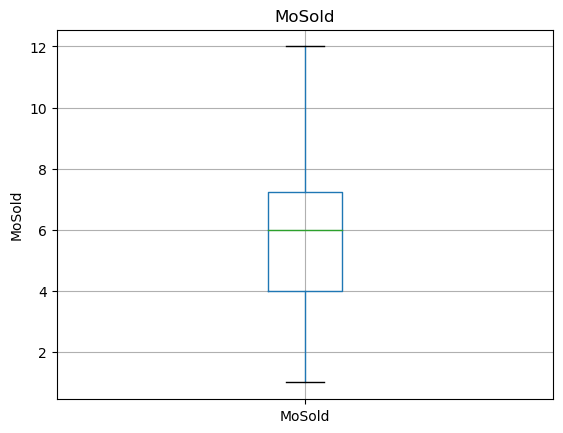

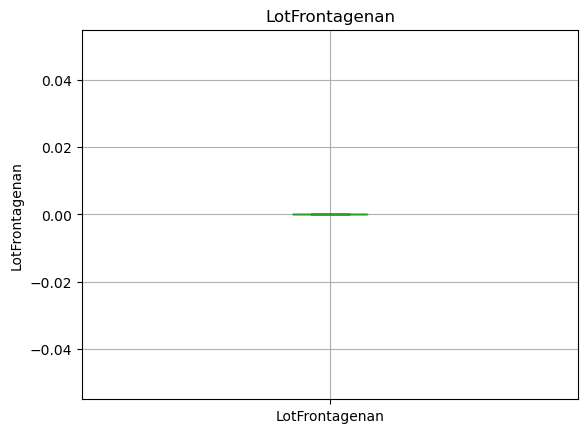

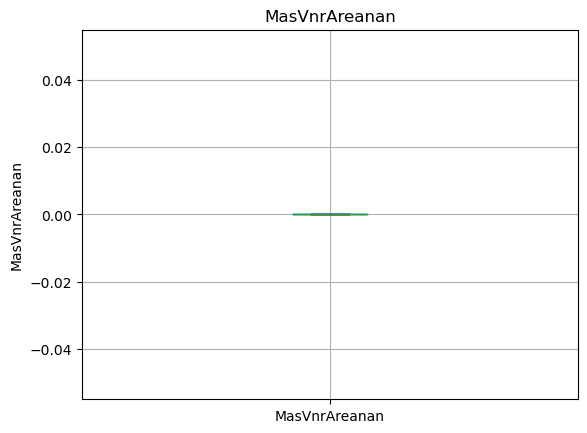

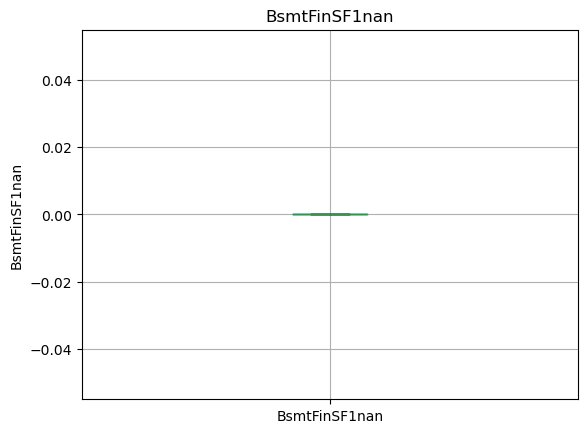

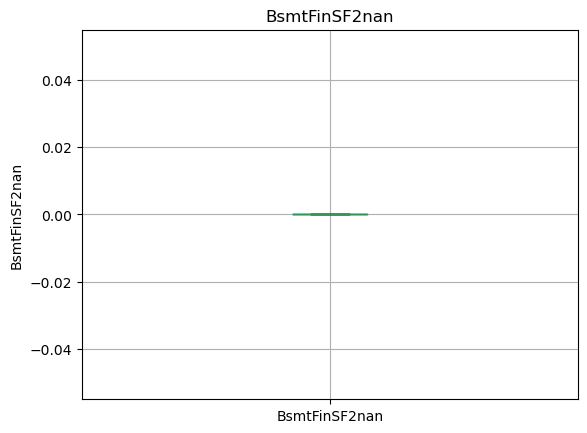

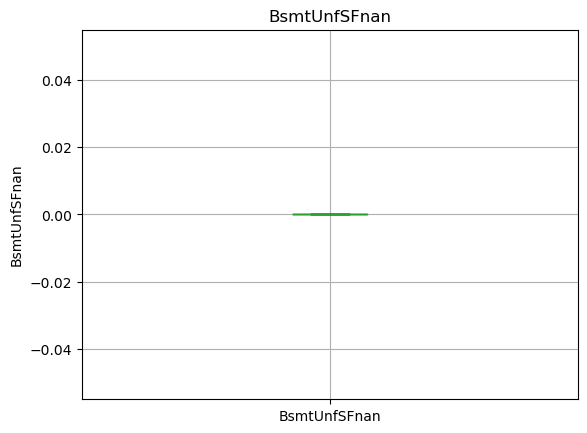

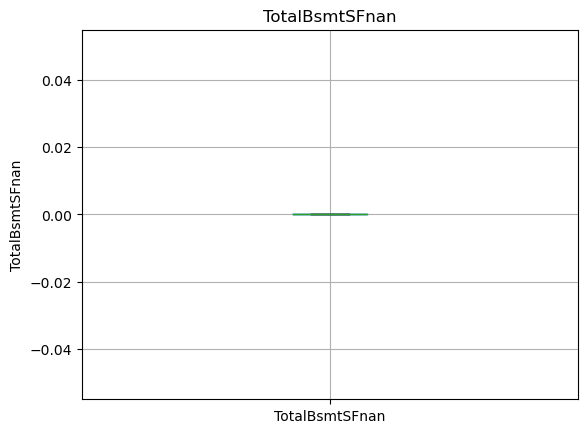

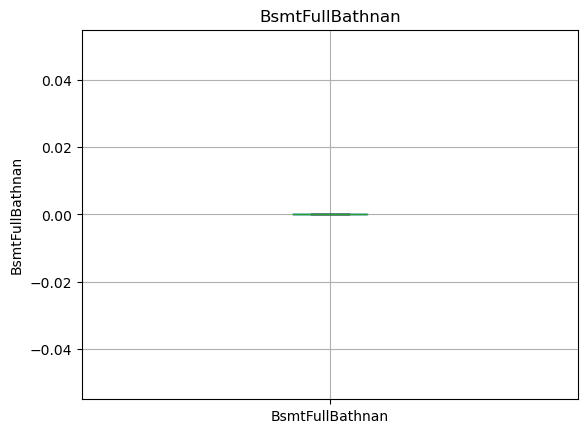

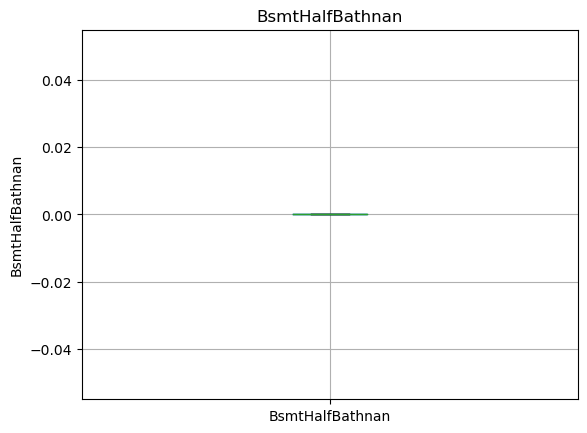

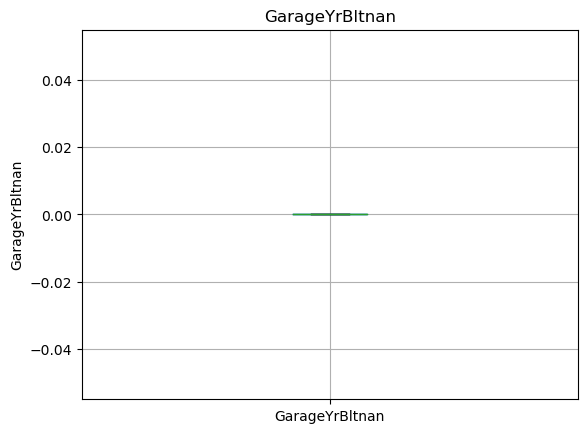

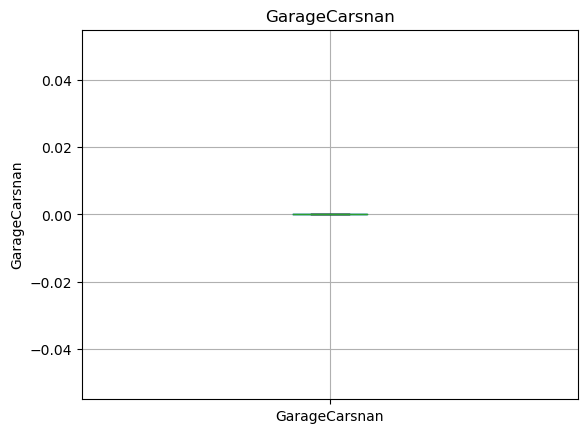

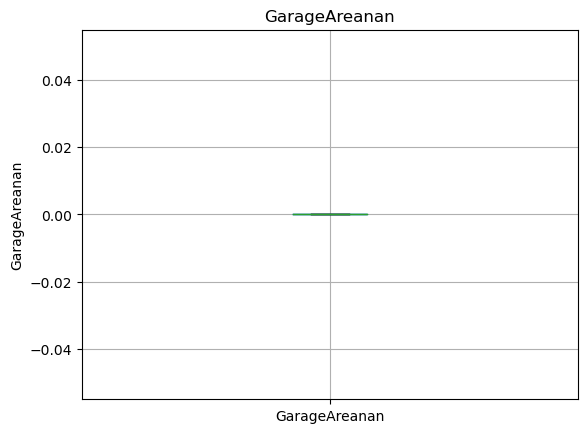

In [213]:
for feature in num_features:
    plt.figure()  # Create a new figure for each boxplot
    dataset.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

## 6. Encoding categorical variable

In [214]:
for feature in categorical_features:
    labels_ordered = dataset.groupby([feature])[feature].count().sort_values().index
    labels_ordered = {k: i for i, k in enumerate(labels_ordered, 0)}
    dataset[feature] = dataset[feature].map(labels_ordered)


In [215]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
2,1463,60,2,4.304065,9.534595,0,2,1,3,0,3,1,16,5,1,0,3,5,5,13,12,1,0,9,9,3,0.0,3,3,2,3,3,4,4,791.0,0,0.0,137.0,928.0,1,1,1,2,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,2,6,3,1,3,3,13.0,0,2.0,482.0,2,2,2,212,34,0,0,0,0,0,2,0,0,3,2010,3,3,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,2,4.356709,9.208138,0,2,1,3,0,3,1,16,5,1,0,3,6,6,12,12,1,0,9,9,2,20.0,3,3,2,2,3,4,4,602.0,0,0.0,324.0,926.0,1,3,1,2,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,3,7,3,1,4,3,12.0,0,2.0,470.0,2,2,2,360,36,0,0,0,0,0,3,0,0,6,2010,3,3,0,0,0,0,0,0,0,0,0,0,0
5,1466,60,2,4.317488,9.210340,0,2,1,3,0,2,1,16,5,1,0,3,6,5,17,16,1,0,8,7,3,0.0,3,3,2,3,3,4,5,0.0,0,0.0,763.0,763.0,1,1,1,2,6.637258,892,0,7.411556,0.0,0.0,2,1,3,1,2,7,3,1,3,3,17.0,0,2.0,440.0,2,2,2,157,84,0,0,0,0,0,3,0,0,4,2010,3,3,0,0,0,0,0,0,0,0,0,0,0
7,1468,60,2,4.143135,9.036225,0,2,1,3,0,3,1,16,5,1,0,3,6,5,12,12,1,0,9,9,3,0.0,3,3,2,3,3,4,5,0.0,0,0.0,789.0,789.0,1,1,1,2,6.670766,676,0,7.289611,0.0,0.0,2,1,3,1,2,7,3,1,4,3,12.0,0,2.0,393.0,2,2,2,0,75,0,0,0,0,0,3,0,0,5,2010,3,3,0,0,0,0,0,0,0,0,0,0,0
16,1477,20,2,4.543295,9.463664,0,2,1,3,0,2,1,11,5,1,0,4,8,5,1,0,1,0,9,9,1,256.0,2,3,2,3,3,4,5,0.0,0,0.0,1544.0,1544.0,1,3,1,2,7.342132,0,0,7.342132,0.0,0.0,2,0,3,1,3,7,3,0,5,3,1.0,2,3.0,868.0,2,2,2,0,35,0,0,0,0,0,3,0,0,6,2010,2,2,0,0,0,0,0,0,0,0,0,0,0


## 8. Feature Scaling

In [216]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Id'] ]
len(scaling_feature)

90

In [217]:
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [218]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[scaling_feature])

MinMaxScaler()

In [219]:
scaler.transform(dataset[scaling_feature])

array([[0.61538462, 1.        , 0.60566743, ..., 0.        , 0.        ,
        0.        ],
       [0.61538462, 1.        , 0.6619613 , ..., 0.        , 0.        ,
        0.        ],
       [0.61538462, 1.        , 0.62002115, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.54624455, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.87280033, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.34515341, ..., 0.        , 0.        ,
        0.        ]])

In [220]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Id']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[scaling_feature]), columns=scaling_feature)],
                    axis=1)

In [221]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1463,0.615385,1.0,0.605667,0.728428,0.0,1.0,0.5,1.0,0.0,1.000000,1.0,0.941176,1.0,1.0,0.0,0.75,0.333333,0.333333,0.135417,0.203390,1.0,0.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,0.8,0.470273,0.0,0.0,0.078917,0.412094,1.0,0.333333,1.0,1.0,0.358455,0.529057,0.0,0.566846,0.0,0.0,0.5,1.0,0.0,0.0,0.666667,0.333333,1.0,0.5,0.6,1.0,0.135417,0.0,0.5,0.428369,1.0,1.0,1.0,0.495327,0.172589,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.181818,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1464,0.615385,1.0,0.661961,0.496525,0.0,1.0,0.5,1.0,0.0,1.000000,1.0,0.941176,1.0,1.0,0.0,0.75,0.500000,0.666667,0.125000,0.203390,1.0,0.0,1.000000,1.000000,0.666667,0.047847,1.000000,1.0,1.0,0.666667,1.0,1.0,0.8,0.357907,0.0,0.0,0.186636,0.410974,1.0,1.000000,1.0,1.0,0.356626,0.511698,0.0,0.553490,0.0,0.0,0.5,1.0,0.0,0.0,1.000000,0.666667,1.0,0.5,0.8,1.0,0.125000,0.0,0.5,0.411348,1.0,1.0,1.0,0.841121,0.182741,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.454545,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1466,0.615385,1.0,0.620021,0.498090,0.0,1.0,0.5,1.0,0.0,0.666667,1.0,0.941176,1.0,1.0,0.0,0.75,0.500000,0.333333,0.177083,0.271186,1.0,0.0,0.888889,0.777778,1.000000,0.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,0.000000,0.0,0.0,0.439516,0.319709,1.0,0.333333,1.0,1.0,0.192498,0.673208,0.0,0.580521,0.0,0.0,0.5,1.0,0.0,0.0,0.666667,0.666667,1.0,0.5,0.6,1.0,0.177083,0.0,0.5,0.368794,1.0,1.0,1.0,0.366822,0.426396,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.272727,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1468,0.615385,1.0,0.433579,0.374405,0.0,1.0,0.5,1.0,0.0,1.000000,1.0,0.941176,1.0,1.0,0.0,0.75,0.500000,0.333333,0.125000,0.203390,1.0,0.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,0.000000,0.0,0.0,0.454493,0.334267,1.0,0.333333,1.0,1.0,0.220903,0.510189,0.0,0.475210,0.0,0.0,0.5,1.0,0.0,0.0,0.666667,0.666667,1.0,0.5,0.8,1.0,0.125000,0.0,0.5,0.302128,1.0,1.0,1.0,0.000000,0.380711,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.363636,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1477,0.000000,1.0,0.861484,0.678041,0.0,1.0,0.5,1.0,0.0,0.666667,1.0,0.647059,1.0,1.0,0.0,1.00,0.833333,0.333333,0.010417,0.000000,1.0,0.0,1.000000,1.000000,0.333333,0.612440,0.666667,1.0,1.0,1.000000,1.0,1.0,1.0,0.000000,0.0,0.0,0.889401,0.756999,1.0,1.000000,1.0,1.0,0.790017,0.000000,0.0,0.520566,0.0,0.0,0.5,0.0,0.0,0.0,1.000000,0.666667,1.0,0.0,1.0,1.0,0.010417,1.0,1.0,0.975887,1.0,1.0,1.0,0.000000,0.177665,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.454545,1.0,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Selection

In [222]:
# Selected features from the train set
selected_features = ['Neighborhood', 'OverallQual', 'YearRemodAdd', 'MasVnrType',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual',
       'GarageFinish', 'GarageCars', 'GarageArea', 'OpenPorchSF']

In [223]:
X_test = dataset[selected_features]

In [224]:
X_test.to_csv('X_test.csv',index=False)